<a href="https://colab.research.google.com/github/duongn169/duongn169/blob/main/B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

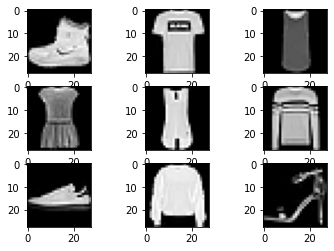

In [ ]:
for i in range(9):
        plt.subplot(330+i+1)
        plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train =X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
X_train= X_train.astype('float32')

In [ ]:
X_test=X_test.astype('float32')

In [ ]:
X_train/=255

In [ ]:
X_test /= 255

In [ ]:
pip install np_utils

     |████████████████████████████████| 61 kB 521 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=3958a9c1c2a0d7bcde6ff33e07bab7fddbfc262f1b246d8862825d9437fc6e9b
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping
history = model.fit(X_train,y_train,batch_size = 128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])


Epoch 1/500
375/375 [==============================] - 9s 20ms/step - loss: 0.5857 - accuracy: 0.7859 - val_loss: 0.3924 - val_accuracy: 0.8572
Epoch 2/500
375/375 [==============================] - 7s 19ms/step - loss: 0.4154 - accuracy: 0.8473 - val_loss: 0.3979 - val_accuracy: 0.8567
Epoch 3/500
375/375 [==============================] - 7s 19ms/step - loss: 0.3744 - accuracy: 0.8626 - val_loss: 0.4077 - val_accuracy: 0.8522
Epoch 4/500
375/375 [==============================] - 7s 19ms/step - loss: 0.3534 - accuracy: 0.8706 - val_loss: 0.3669 - val_accuracy: 0.8724
Epoch 5/500
375/375 [==============================] - 7s 19ms/step - loss: 0.3408 - accuracy: 0.8778 - val_loss: 0.3902 - val_accuracy: 0.8642
Epoch 6/500
375/375 [==============================] - 7s 20ms/step - loss: 0.3280 - accuracy: 0.8811 - val_loss: 0.3694 - val_accuracy: 0.8714
Epoch 7/500
375/375 [==============================] - 8s 20ms/step - loss: 0.3149 - accuracy: 0.8850 - val_loss: 0.3633 - val_accuracy:

In [ ]:
model.save('B1.h5')

In [ ]:
score=model.evaluate(X_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test Accuracy: ',score[1])

Test loss:  0.49669888615608215
Test Accuracy:  0.8871999979019165


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'Train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys


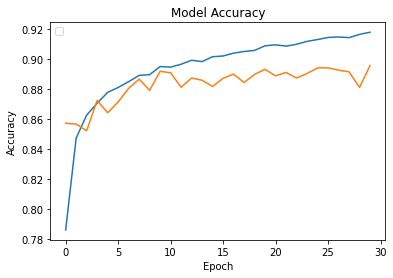

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'],['Validation'],loc='upper left')
plt.show()

In [ ]:

y_pred=model.predict(X_test)
print(y_pred)

[[1.72110243e-12 2.19455020e-22 8.21364884e-15 ... 7.09090891e-05
  2.92956065e-15 9.99927998e-01]
 [1.81404569e-09 1.99937447e-24 9.99967813e-01 ... 1.04164064e-29
  1.31013878e-21 2.14306458e-28]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.26774279e-15 1.05539578e-32 1.46214157e-22 ... 4.17524387e-22
  1.00000000e+00 7.77679555e-36]
 [3.70060315e-35 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.65647554e-07 2.46135946e-12 2.40345734e-08 ... 1.30571832e-04
  2.39529218e-05 7.54611074e-06]]
